In [17]:
import pandas as pd
message = "Begining dataset cleaning"
print(message)

print('--------------------------------- Begining reading 📖 ---------------------------------')
print('\n')
dataset = pd.read_json('./data/comptage-velo-donnees-compteurs.json')
print('--------------------------------- Reading done ✅ ---------------------------------')
print('\n')
data = pd.DataFrame(dataset).from_dict(dataset)
print('--------------------------------- Begining dataset cleaning 🗑 ---------------------------------')
print('\n')
data


Begining dataset cleaning
--------------------------------- Begining reading 📖 ---------------------------------


--------------------------------- Reading done ✅ ---------------------------------


--------------------------------- Begining dataset cleaning 🗑 ---------------------------------




,datasetid,recordid,fields,geometry,record_timestamp
0,comptage-velo-donnees-compteurs,ef5a8926e5ffa2afe942a22bce813d3b7b5ed91b,{'url_photos_n1': 'https://www.eco-visio.net/P...,"{'type': 'Point', 'coordinates': [2.33338, 48....",2021-11-23T08:00:03.265+01:00
1,comptage-velo-donnees-compteurs,da9f82c7397ded76ccca768ac1de7227f19bb83b,{'url_photos_n1': 'https://www.eco-visio.net/P...,"{'type': 'Point', 'coordinates': [2.33338, 48....",2021-11-23T08:00:03.265+01:00
2,comptage-velo-donnees-compteurs,343bbbe29dc14c67aaf3d82fab5494e9325179c3,{'url_photos_n1': 'https://www.eco-visio.net/P...,"{'type': 'Point', 'coordinates': [2.33338, 48....",2021-11-23T08:00:03.265+01:00
3,comptage-velo-donnees-compteurs,ae6176a583ba76bb82a6176cba4938dc2bcf8f10,{'url_photos_n1': 'https://www.eco-visio.net/P...,"{'type': 'Point', 'coordinates': [2.33338, 48....",2021-11-23T08:00:03.265+01:00
4,comptage-velo-donnees-compteurs,2758a1656d8b58b6a3f676750521c0e4ad07828b,{'url_photos_n1': 'https://www.eco-visio.net/P...,"{'type': 'Point', 'coordinates': [2.33338, 48....",2021-11-23T08:00:03.265+01:00
...,...,...,...,...,...
950413,comptage-velo-donnees-compteurs,456b49cd4a0db242bc4e415f2075fd0550f45c40,{'url_photos_n1': 'https://www.eco-visio.net/P...,"{'type': 'Point', 'coordinates': [2.32203, 48....",2021-11-23T08:39:53.355+01:00
950414,comptage-velo-donnees-compteurs,e24b85cd2fb73b6beec79444177ddba7962b95e0,{'url_photos_n1': 'https://www.eco-visio.net/P...,"{'type': 'Point', 'coordinates': [2.32203, 48....",2021-11-23T08:39:53.355+01:00
950415,comptage-velo-donnees-compteurs,0f1bd184cd5618677173cefb1398c0905099779e,{'url_photos_n1': 'https://www.eco-visio.net/P...,"{'type': 'Point', 'coordinates': [2.32203, 48....",2021-11-23T08:39:53.355+01:00
950416,comptage-velo-donnees-compteurs,bbde2fee1241eabb6d66f01f430af234ea42c364,{'url_photos_n1': 'https://www.eco-visio.net/P...,"{'type': 'Point', 'coordinates': [2.32203, 48....",2021-11-23T08:39:53.355+01:00


In [18]:
dataframe_fields = data['fields']
counter_name_column = []
sum_couts_holrder = []
ids_holder = []
id_compteur_holder = []
names_holder = []
latitude_holder = []
longitude_holder = []
records_dates_holder = []
for index, value in enumerate(dataframe_fields):
    if(index == 10):
        print(value)
    counter_name_column.append(value['nom_compteur'])
    records_dates_holder.append(value['date'])
    sum_couts_holrder.append(value['sum_counts'])
    ids_holder.append(value['id'])
    id_compteur_holder.append(value['id_compteur'])
    names_holder.append(value['name'])
data['nom_compteur'] = counter_name_column
data['counter_update'] = records_dates_holder
data['sum_counts'] = sum_couts_holrder
data['id'] = ids_holder
data['id_compteur'] = id_compteur_holder
data['name'] = names_holder
for index, value in enumerate(data['geometry']):
    if(index == 10):
        print('Debugging')
        print(value['coordinates'])
    longitude_holder.append(value['coordinates'][0])
    latitude_holder.append(value['coordinates'][1])
data['latitude'] = latitude_holder
data['longitude'] = longitude_holder
data.pop('geometry')
data.pop('record_timestamp')
data.pop('fields')
data.pop('datasetid')
print('--------------------------------- Dataset cleaned ✅ ---------------------------------')
print('\n')
data
# data['nom_compteur'].unique()
# print(data.loc[data['fields'] ==
#       'ef5a8926e5ffa2afe942a22bce813d3b7b5ed91b'])
# data.loc(data['nom_compteur' == '97 avenue Denfert Rochereau SO-NE'])


{'url_photos_n1': 'https://www.eco-visio.net/Photos/100003096/https:', 'name': '97 avenue Denfert Rochereau', 'nom_compteur': '97 avenue Denfert Rochereau SO-NE', 'sum_counts': 41.0, 'counter': 'X2H20012081', 'coordinates': [48.83511, 2.33338], 'installation_date': '2012-02-22', 'date': '2020-10-01T18:00:00+02:00', 'id_compteur': '100003096-353242251', 'id': '100003096'}
Debugging
[2.33338, 48.83511]
--------------------------------- Dataset cleaned ✅ ---------------------------------




,recordid,nom_compteur,counter_update,sum_counts,id,id_compteur,name,latitude,longitude
0,ef5a8926e5ffa2afe942a22bce813d3b7b5ed91b,97 avenue Denfert Rochereau SO-NE,2020-10-01T04:00:00+02:00,0.0,100003096,100003096-353242251,97 avenue Denfert Rochereau,48.83511,2.33338
1,da9f82c7397ded76ccca768ac1de7227f19bb83b,97 avenue Denfert Rochereau SO-NE,2020-10-01T03:00:00+02:00,1.0,100003096,100003096-353242251,97 avenue Denfert Rochereau,48.83511,2.33338
2,343bbbe29dc14c67aaf3d82fab5494e9325179c3,97 avenue Denfert Rochereau SO-NE,2020-10-01T05:00:00+02:00,2.0,100003096,100003096-353242251,97 avenue Denfert Rochereau,48.83511,2.33338
3,ae6176a583ba76bb82a6176cba4938dc2bcf8f10,97 avenue Denfert Rochereau SO-NE,2020-10-01T08:00:00+02:00,42.0,100003096,100003096-353242251,97 avenue Denfert Rochereau,48.83511,2.33338
4,2758a1656d8b58b6a3f676750521c0e4ad07828b,97 avenue Denfert Rochereau SO-NE,2020-10-01T13:00:00+02:00,38.0,100003096,100003096-353242251,97 avenue Denfert Rochereau,48.83511,2.33338
...,...,...,...,...,...,...,...,...,...
950413,456b49cd4a0db242bc4e415f2075fd0550f45c40,Quai des Tuileries SE-NO,2021-11-22T14:00:00+01:00,53.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203
950414,e24b85cd2fb73b6beec79444177ddba7962b95e0,Quai des Tuileries SE-NO,2021-11-22T16:00:00+01:00,62.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203
950415,0f1bd184cd5618677173cefb1398c0905099779e,Quai des Tuileries SE-NO,2021-11-22T19:00:00+01:00,148.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203
950416,bbde2fee1241eabb6d66f01f430af234ea42c364,Quai des Tuileries SE-NO,2021-11-22T22:00:00+01:00,5.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203


In [19]:
data['counter_update'] = pd.to_datetime(data['counter_update'])
data


,recordid,nom_compteur,counter_update,sum_counts,id,id_compteur,name,latitude,longitude
0,ef5a8926e5ffa2afe942a22bce813d3b7b5ed91b,97 avenue Denfert Rochereau SO-NE,2020-10-01 04:00:00+02:00,0.0,100003096,100003096-353242251,97 avenue Denfert Rochereau,48.83511,2.33338
1,da9f82c7397ded76ccca768ac1de7227f19bb83b,97 avenue Denfert Rochereau SO-NE,2020-10-01 03:00:00+02:00,1.0,100003096,100003096-353242251,97 avenue Denfert Rochereau,48.83511,2.33338
2,343bbbe29dc14c67aaf3d82fab5494e9325179c3,97 avenue Denfert Rochereau SO-NE,2020-10-01 05:00:00+02:00,2.0,100003096,100003096-353242251,97 avenue Denfert Rochereau,48.83511,2.33338
3,ae6176a583ba76bb82a6176cba4938dc2bcf8f10,97 avenue Denfert Rochereau SO-NE,2020-10-01 08:00:00+02:00,42.0,100003096,100003096-353242251,97 avenue Denfert Rochereau,48.83511,2.33338
4,2758a1656d8b58b6a3f676750521c0e4ad07828b,97 avenue Denfert Rochereau SO-NE,2020-10-01 13:00:00+02:00,38.0,100003096,100003096-353242251,97 avenue Denfert Rochereau,48.83511,2.33338
...,...,...,...,...,...,...,...,...,...
950413,456b49cd4a0db242bc4e415f2075fd0550f45c40,Quai des Tuileries SE-NO,2021-11-22 14:00:00+01:00,53.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203
950414,e24b85cd2fb73b6beec79444177ddba7962b95e0,Quai des Tuileries SE-NO,2021-11-22 16:00:00+01:00,62.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203
950415,0f1bd184cd5618677173cefb1398c0905099779e,Quai des Tuileries SE-NO,2021-11-22 19:00:00+01:00,148.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203
950416,bbde2fee1241eabb6d66f01f430af234ea42c364,Quai des Tuileries SE-NO,2021-11-22 22:00:00+01:00,5.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203


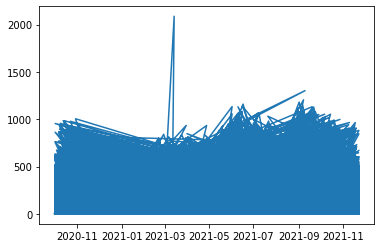

In [20]:
import matplotlib.pyplot as plt
# can save 1,20
fig = plt.figure(facecolor='w')
plt.plot(data.counter_update, data.sum_counts)
